<a href="https://colab.research.google.com/github/bikram0001/ML_projects/blob/main/PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**importing the important libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras

#**downloading the datasets from the tensorflow**

In [ ]:
train_data=tfds.load(name="rock_paper_scissors",split="train",as_supervised=True)
test_data=tfds.load(name="rock_paper_scissors",split="test",as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/2520 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/rock_paper_scissors/3.0.0.incomplete3AZVUW/rock_paper_scissors-train.tfrecord*…

Generating test examples...:   0%|          | 0/372 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/rock_paper_scissors/3.0.0.incomplete3AZVUW/rock_paper_scissors-test.tfrecord*.…

Dataset rock_paper_scissors downloaded and prepared to ~/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


In [ ]:
print('train dataset:', train_data)
print('train dataset size:', len(list(train_data)), '\n')

print('test dataset:', test_data)
print('test dataset size:', len(list(test_data)), '\n')

train dataset: <PrefetchDataset element_spec=(TensorSpec(shape=(300, 300, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
train dataset size: 2520 

test dataset: <PrefetchDataset element_spec=(TensorSpec(shape=(300, 300, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
test dataset size: 372 



#**dataset information**

In [ ]:
builder = tfds.builder('rock_paper_scissors')
dataset_info = builder.info
dataset_info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    version=3.0.0,
    description='Images of hands playing rock, paper, scissor game.',
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    total_num_examples=2892,
    splits={
        'test': 372,
        'train': 2520,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }""",
    redistribution_info=,
)

#**Splitting the dataset into train and test images**

In [ ]:
NUMBER_OF_TRAIN_EXAMPLES = dataset_info.splits['train'].num_examples
NUMBER_OF_TEST_EXAMPLES = dataset_info.splits['test'].num_examples
NUMBER_OF_CLASSES = dataset_info.features['label'].num_classes

#**size of the train and test data**

In [ ]:
print('Number of TRAIN examples:', NUMBER_OF_TRAIN_EXAMPLES)
print('Number of TEST examples:', NUMBER_OF_TEST_EXAMPLES)
print('Number of label classes:', NUMBER_OF_CLASSES)

Number of TRAIN examples: 2520
Number of TEST examples: 372
Number of label classes: 3


In [ ]:
INPUT_IMG_SIZE_ORIGINAL = dataset_info.features['image'].shape[0]
INPUT_IMG_SHAPE_ORIGINAL = dataset_info.features['image'].shape

In [ ]:
print(INPUT_IMG_SIZE_ORIGINAL)
print(INPUT_IMG_SHAPE_ORIGINAL)

300
(300, 300, 3)


#**reducing the size of the image**

In [ ]:
INPUT_IMG_SIZE_REDUCED = INPUT_IMG_SIZE_ORIGINAL // 2
INPUT_IMG_SHAPE_REDUCED = (
    INPUT_IMG_SIZE_REDUCED,
    INPUT_IMG_SIZE_REDUCED,
    INPUT_IMG_SHAPE_ORIGINAL[2]
)

In [ ]:
INPUT_IMG_SIZE = INPUT_IMG_SIZE_REDUCED
INPUT_IMG_SHAPE = INPUT_IMG_SHAPE_REDUCED

In [ ]:
print(INPUT_IMG_SHAPE)

(150, 150, 3)


In [ ]:
print(INPUT_IMG_SIZE)

150


In [ ]:
get_label_name = dataset_info.features['label'].int2str

#**The output fields of the training data**

In [ ]:
print(get_label_name(0))
print(get_label_name(1))
print(get_label_name(2))

rock
paper
scissors


#**Displaying some images of the training set**

In [ ]:
def preview_dataset(dataset):
    plt.figure(figsize=(12, 12))
    plot_index = 0
    for features in dataset.take(12):
        (image, label) = features
        plot_index += 1
        plt.subplot(3, 4, plot_index)
        label = get_label_name(label.numpy())
        plt.title('Label: %s' % label)
        plt.imshow(image.numpy())

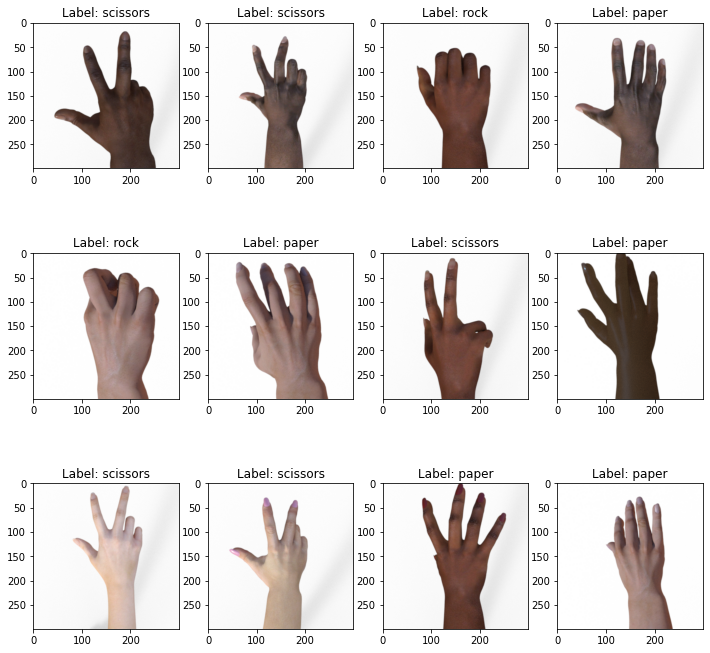

In [ ]:
preview_dataset(train_data)

#**Normalizing the Image**

In [ ]:
def format_example(image, label):
    #casts the tensor to a new type
    image = tf.cast(image, tf.float32)
    image = image / 255.
    image = tf.image.resize(image, [INPUT_IMG_SIZE, INPUT_IMG_SIZE])
    return image, label

In [ ]:
dataset_train = train_data.map(format_example)
dataset_test = test_data.map(format_example)

In [ ]:
(first_image, first_label) = list(dataset_train.take(1))[0]
print('Label:', first_label.numpy(), '\n')
print('Image shape:', first_image.numpy().shape, '\n')
print(first_image.numpy())

Label: 2 

Image shape: (150, 150, 3) 

[[[0.995098   0.995098   0.995098  ]
  [0.995098   0.995098   0.995098  ]
  [0.995098   0.995098   0.995098  ]
  ...
  [0.9852941  0.9852941  0.9852941 ]
  [0.9843137  0.9843137  0.9843137 ]
  [0.98039216 0.98039216 0.98039216]]

 [[0.99607843 0.99607843 0.99607843]
  [0.995098   0.995098   0.995098  ]
  [0.995098   0.995098   0.995098  ]
  ...
  [0.98333335 0.98333335 0.98333335]
  [0.9813726  0.9813726  0.9813726 ]
  [0.98333335 0.98333335 0.98333335]]

 [[0.99607843 0.99607843 0.99607843]
  [0.9941176  0.9941176  0.9941176 ]
  [0.9941176  0.9941176  0.9941176 ]
  ...
  [0.9852941  0.9852941  0.9852941 ]
  [0.9852941  0.9852941  0.9852941 ]
  [0.9813726  0.9813726  0.9813726 ]]

 ...

 [[0.9862745  0.9862745  0.9862745 ]
  [0.98725486 0.98725486 0.98725486]
  [0.9882353  0.9882353  0.9882353 ]
  ...
  [0.9705882  0.9705882  0.9705882 ]
  [0.97352946 0.97352946 0.97352946]
  [0.9754902  0.9754902  0.9754902 ]]

 [[0.9882353  0.9882353  0.9882353

#**DATA AUGMENTATION**

To fight the model overfitting and to generalize the model to a broader set of examples we can try to augment the training data.

FLIPPING THE IMAGES
(HORIZONTAL FLIP OR VERTICAL FLIP)

In [ ]:
def augment_flip(image: tf.Tensor) -> tf.Tensor:
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    return image

APPLYING ROTATION ON IMAGES TO RANDOMLY ROTATE THE IMAGES

In [ ]:
def augment_rotation(image: tf.Tensor) -> tf.Tensor:
    return tf.image.rot90(
        image,
        tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32)
    )

ZOOMING IMAGES TO GET A BETTER TRAINING IMAGES

In [ ]:
def augment_zoom(image: tf.Tensor, min_zoom=0.8, max_zoom=1.0) -> tf.Tensor:
    image_width, image_height, image_colors = image.shape
    crop_size = (image_width, image_height)

    scales = list(np.arange(min_zoom, max_zoom, 0.01))
    boxes = np.zeros((len(scales), 4))

    for i, scale in enumerate(scales):
        x1 = y1 = 0.5 - (0.5 * scale)
        x2 = y2 = 0.5 + (0.5 * scale)
        boxes[i] = [x1, y1, x2, y2]

    def random_crop(img):
        crops = tf.image.crop_and_resize(
            [img],
            boxes=boxes,
            box_indices=np.zeros(len(scales)),
            crop_size=crop_size
        )
        return crops[tf.random.uniform(shape=[], minval=0, maxval=len(scales), dtype=tf.int32)]

    choice = tf.random.uniform(shape=[], minval=0., maxval=1., dtype=tf.float32)
    return tf.cond(choice < 0.5, lambda: image, lambda: random_crop(image))

DEFINING A FUNCTION TO PERFORM ABOVE AUGMENTATIONS

In [ ]:
def augment_data(image, label):
    image = augment_flip(image)
    image = augment_rotation(image)
    image = augment_zoom(image)
    return image, label

APPLYING ABOVE AUGMENTATIONS TO THE TRAIN IMAGES

In [ ]:
dataset_train_augmented = dataset_train.map(augment_data)

DISPLAYING SOME OF RANDOM TRAINING IMAGES

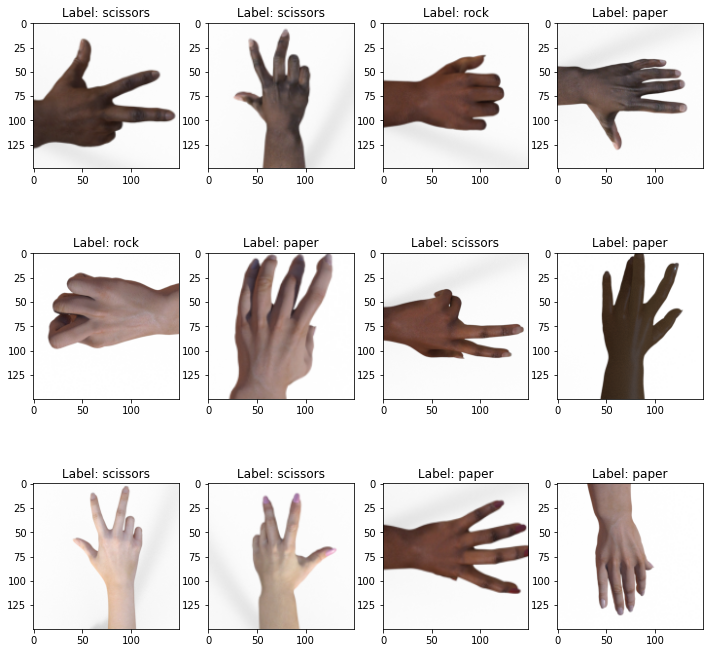

In [ ]:
preview_dataset(dataset_train_augmented)

DISPLAYING SOME OF RANDOM TEST IMAGES

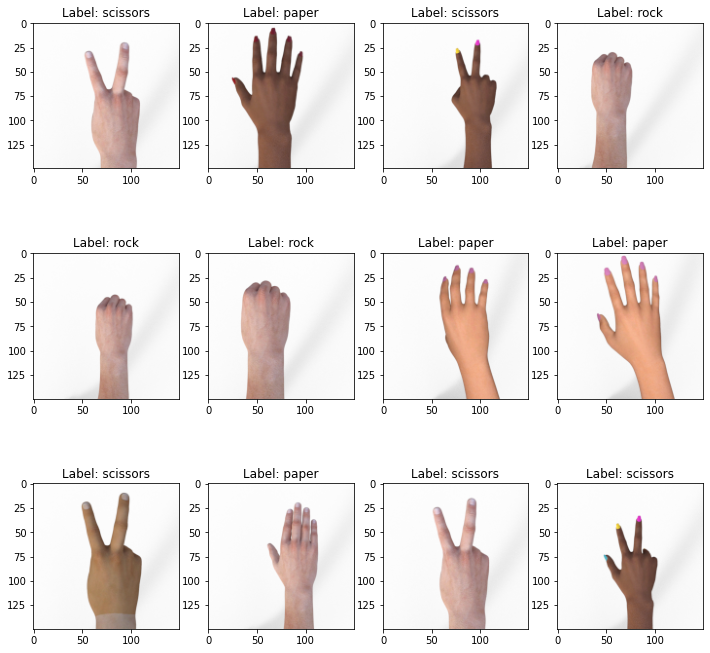

In [ ]:
preview_dataset(dataset_test)

In [ ]:
dataset_test

<MapDataset element_spec=(TensorSpec(shape=(150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
BATCH_SIZE = 32

SHUFFLING THE TRAIN DATASET AND CREATING BATCHES

In [ ]:
dataset_train_augmented_shuffled = dataset_train_augmented.shuffle(buffer_size=NUMBER_OF_TRAIN_EXAMPLES)

dataset_train_augmented_shuffled = dataset_train_augmented.batch(batch_size=BATCH_SIZE)

dataset_train_augmented_shuffled = dataset_train_augmented_shuffled.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

dataset_test_shuffled = dataset_test.batch(BATCH_SIZE)

In [ ]:
print(dataset_train_augmented_shuffled)
print(dataset_test_shuffled)

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


CONVERSION OF BATCHES INTO NUMPY ARRAYS

Label batch shape: (32,) 

Image batch shape: (32, 150, 150, 3) 

Label batch: [2 2 0 1 0 1 2 1 2 2 1 1 2 1 1 1 1 1 1 1 1 0 0 0 0 1 1 2 2 2 0 0] 

First batch image: [[[0.98039216 0.98039216 0.98039216]
  [0.9843137  0.9843137  0.9843137 ]
  [0.9852941  0.9852941  0.9852941 ]
  ...
  [0.995098   0.995098   0.995098  ]
  [0.995098   0.995098   0.995098  ]
  [0.995098   0.995098   0.995098  ]]

 [[0.98333335 0.98333335 0.98333335]
  [0.9813726  0.9813726  0.9813726 ]
  [0.98333335 0.98333335 0.98333335]
  ...
  [0.995098   0.995098   0.995098  ]
  [0.995098   0.995098   0.995098  ]
  [0.99607843 0.99607843 0.99607843]]

 [[0.9813726  0.9813726  0.9813726 ]
  [0.9852941  0.9852941  0.9852941 ]
  [0.9852941  0.9852941  0.9852941 ]
  ...
  [0.9941176  0.9941176  0.9941176 ]
  [0.9941176  0.9941176  0.9941176 ]
  [0.99607843 0.99607843 0.99607843]]

 ...

 [[0.9754902  0.9754902  0.9754902 ]
  [0.97352946 0.97352946 0.97352946]
  [0.9705882  0.9705882  0.9705882 ]
  ...
  [0.9882353  0.98823

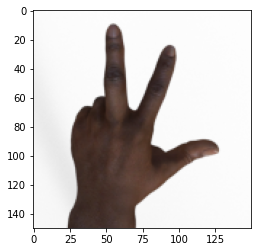

In [ ]:
batches = tfds.as_numpy(dataset_train_augmented_shuffled)
for batch in batches:
    image_batch, label_batch = batch
    print('Label batch shape:', label_batch.shape, '\n')
    print('Image batch shape:', image_batch.shape, '\n')
    print('Label batch:', label_batch, '\n')

    for batch_item_index in range(len(image_batch)):
        print('First batch image:', image_batch[batch_item_index], '\n')
        plt.imshow(image_batch[batch_item_index])
        plt.show()
        break
    break

#**Traing Model**

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(input_shape=INPUT_IMG_SHAPE,filters=64,kernel_size=3,activation=tf.keras.activations.relu))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

model.add(tf.keras.layers.Convolution2D(filters=64,kernel_size=3,activation=tf.keras.activations.relu))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

model.add(tf.keras.layers.Convolution2D(filters=128,kernel_size=3,activation=tf.keras.activations.relu))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

model.add(tf.keras.layers.Convolution2D(filters=128,kernel_size=3,activation=tf.keras.activations.relu))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(units=512,activation=tf.keras.activations.relu))

model.add(tf.keras.layers.Dense(units=3,activation=tf.keras.activations.softmax))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [ ]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
steps_per_epoch = NUMBER_OF_TRAIN_EXAMPLES // BATCH_SIZE
validation_steps = NUMBER_OF_TEST_EXAMPLES // BATCH_SIZE

print('steps_per_epoch:', steps_per_epoch)
print('validation_steps:', validation_steps)

steps_per_epoch: 78
validation_steps: 11


In [ ]:
training_history = model.fit(
    x=dataset_train_augmented_shuffled.repeat(),
    validation_data=dataset_test_shuffled.repeat(),
    epochs=30,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    verbose=1
)

Epoch 1/30
78/78 [==============================] - 26s 325ms/step - loss: 0.9945 - accuracy: 0.4976 - val_loss: 0.9410 - val_accuracy: 0.5852
Epoch 2/30
78/78 [==============================] - 16s 201ms/step - loss: 0.5535 - accuracy: 0.7741 - val_loss: 0.7342 - val_accuracy: 0.6420
Epoch 3/30
78/78 [==============================] - 16s 203ms/step - loss: 0.2981 - accuracy: 0.8939 - val_loss: 0.6348 - val_accuracy: 0.7415
Epoch 4/30
78/78 [==============================] - 16s 206ms/step - loss: 0.2275 - accuracy: 0.9140 - val_loss: 0.8672 - val_accuracy: 0.7159
Epoch 5/30
78/78 [==============================] - 16s 207ms/step - loss: 0.1166 - accuracy: 0.9638 - val_loss: 0.4885 - val_accuracy: 0.7898
Epoch 6/30
78/78 [==============================] - 15s 201ms/step - loss: 0.0967 - accuracy: 0.9723 - val_loss: 0.2573 - val_accuracy: 0.8920
Epoch 7/30
78/78 [==============================] - 17s 217ms/step - loss: 0.0532 - accuracy: 0.9843 - val_loss: 0.4520 - val_accuracy: 0.8352

In [ ]:
def render_training_history(training_history):
    loss = training_history.history['loss']
    val_loss = training_history.history['val_loss']

    accuracy = training_history.history['accuracy']
    val_accuracy = training_history.history['val_accuracy']

    plt.figure(figsize=(14, 4))

    plt.subplot(1, 2, 1)
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.plot(val_loss, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.subplot(1, 2, 2)
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(accuracy, label='Training set')
    plt.plot(val_accuracy, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.show()

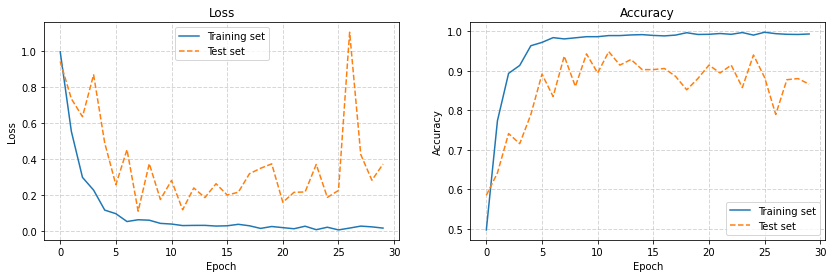

In [ ]:
render_training_history(training_history)

In [ ]:
loss,accuracy=model.evaluate(dataset_test_shuffled)
print("The loss is:",loss)
print("The Test accuracy is:",accuracy)

12/12 [==============================] - 1s 70ms/step - loss: 0.3581 - accuracy: 0.8710
The loss is: 0.3580554723739624
The Test accuracy is: 0.8709677457809448


In [ ]:
prediction = model.predict(dataset_test_shuffled)
prediction

array([[3.7722621e-05, 3.0342881e-05, 9.9993193e-01],
       [5.5468477e-12, 1.0000000e+00, 4.2783470e-09],
       [1.7535690e-08, 2.6426151e-05, 9.9997354e-01],
       ...,
       [1.0000000e+00, 3.6813223e-08, 3.7185671e-13],
       [5.7970057e-10, 9.9995375e-01, 4.6280951e-05],
       [2.3937403e-07, 2.1802720e-01, 7.8197253e-01]], dtype=float32)

In [ ]:
pred_labels=tf.math.argmax(prediction,axis=1)
l=[]
for i in pred_labels:
  l.append(get_label_name(i))
print(l)

['scissors', 'paper', 'scissors', 'rock', 'rock', 'rock', 'paper', 'paper', 'scissors', 'scissors', 'scissors', 'scissors', 'rock', 'rock', 'rock', 'scissors', 'scissors', 'scissors', 'rock', 'paper', 'paper', 'rock', 'scissors', 'paper', 'scissors', 'scissors', 'rock', 'rock', 'scissors', 'rock', 'paper', 'rock', 'scissors', 'scissors', 'rock', 'rock', 'paper', 'rock', 'paper', 'scissors', 'scissors', 'paper', 'scissors', 'paper', 'paper', 'scissors', 'scissors', 'paper', 'rock', 'scissors', 'rock', 'scissors', 'rock', 'paper', 'scissors', 'paper', 'paper', 'scissors', 'paper', 'paper', 'paper', 'scissors', 'rock', 'scissors', 'rock', 'paper', 'paper', 'scissors', 'scissors', 'paper', 'rock', 'paper', 'rock', 'paper', 'paper', 'rock', 'paper', 'rock', 'rock', 'paper', 'rock', 'scissors', 'scissors', 'paper', 'scissors', 'rock', 'rock', 'paper', 'scissors', 'rock', 'scissors', 'scissors', 'paper', 'rock', 'rock', 'paper', 'paper', 'scissors', 'rock', 'scissors', 'rock', 'paper', 'rock'